In [2]:
from sys import path
from os import getcwd
print(getcwd())
path.append("/Users/walup/Library/CloudStorage/GoogleDrive-walup.legaria@gmail.com/My Drive/Cancer_Immune_Project_Final_Version/Tumor_Immune_System_Simulation/Model")


from TumorModel import CellType
from TumorModel import Cell
from TumorModel import Tissue
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

/Users/walup/Library/CloudStorage/GoogleDrive-walup.legaria@gmail.com/My Drive/Cancer_Immune_Project_Final_Version/Tumor_Immune_System_Simulation/Tests


### Non-Malignant variant

In [3]:
#Create a new tissue
automatonWidth = 100
automatonHeight = 100

tissue1 = Tissue(automatonWidth, automatonHeight)

centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissue1.addProliferatingCell(centerX, centerY)
tissue1.addProliferatingCell(centerX + 1, centerY)
tissue1.addProliferatingCell(centerX -1, centerY)
tissue1.addProliferatingCell(centerX, centerY + 1)
tissue1.addProliferatingCell(centerX, centerY - 1)


nSteps = 300
tissue1.immuneSystem.boundarySpawn = True
tissue1.evolve(nSteps, False, False, True)

100%|█████████████████████████████████████████| 300/300 [01:20<00:00,  3.75it/s]


### Malignant variant

In [4]:
automatonWidth = 100
automatonHeight = 100

tissue3 = Tissue(automatonWidth, automatonHeight)

centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissue3.addProliferatingCell(centerX, centerY)
tissue3.addProliferatingCell(centerX + 1, centerY)
tissue3.addProliferatingCell(centerX -1, centerY)
tissue3.addProliferatingCell(centerX, centerY + 1)
tissue3.addProliferatingCell(centerX, centerY - 1)

tissue3.makeTumorMalignant()
nSteps = 300
tissue3.evolve(nSteps, False, False, True)

100%|█████████████████████████████████████████| 300/300 [01:38<00:00,  3.06it/s]


### Master graph

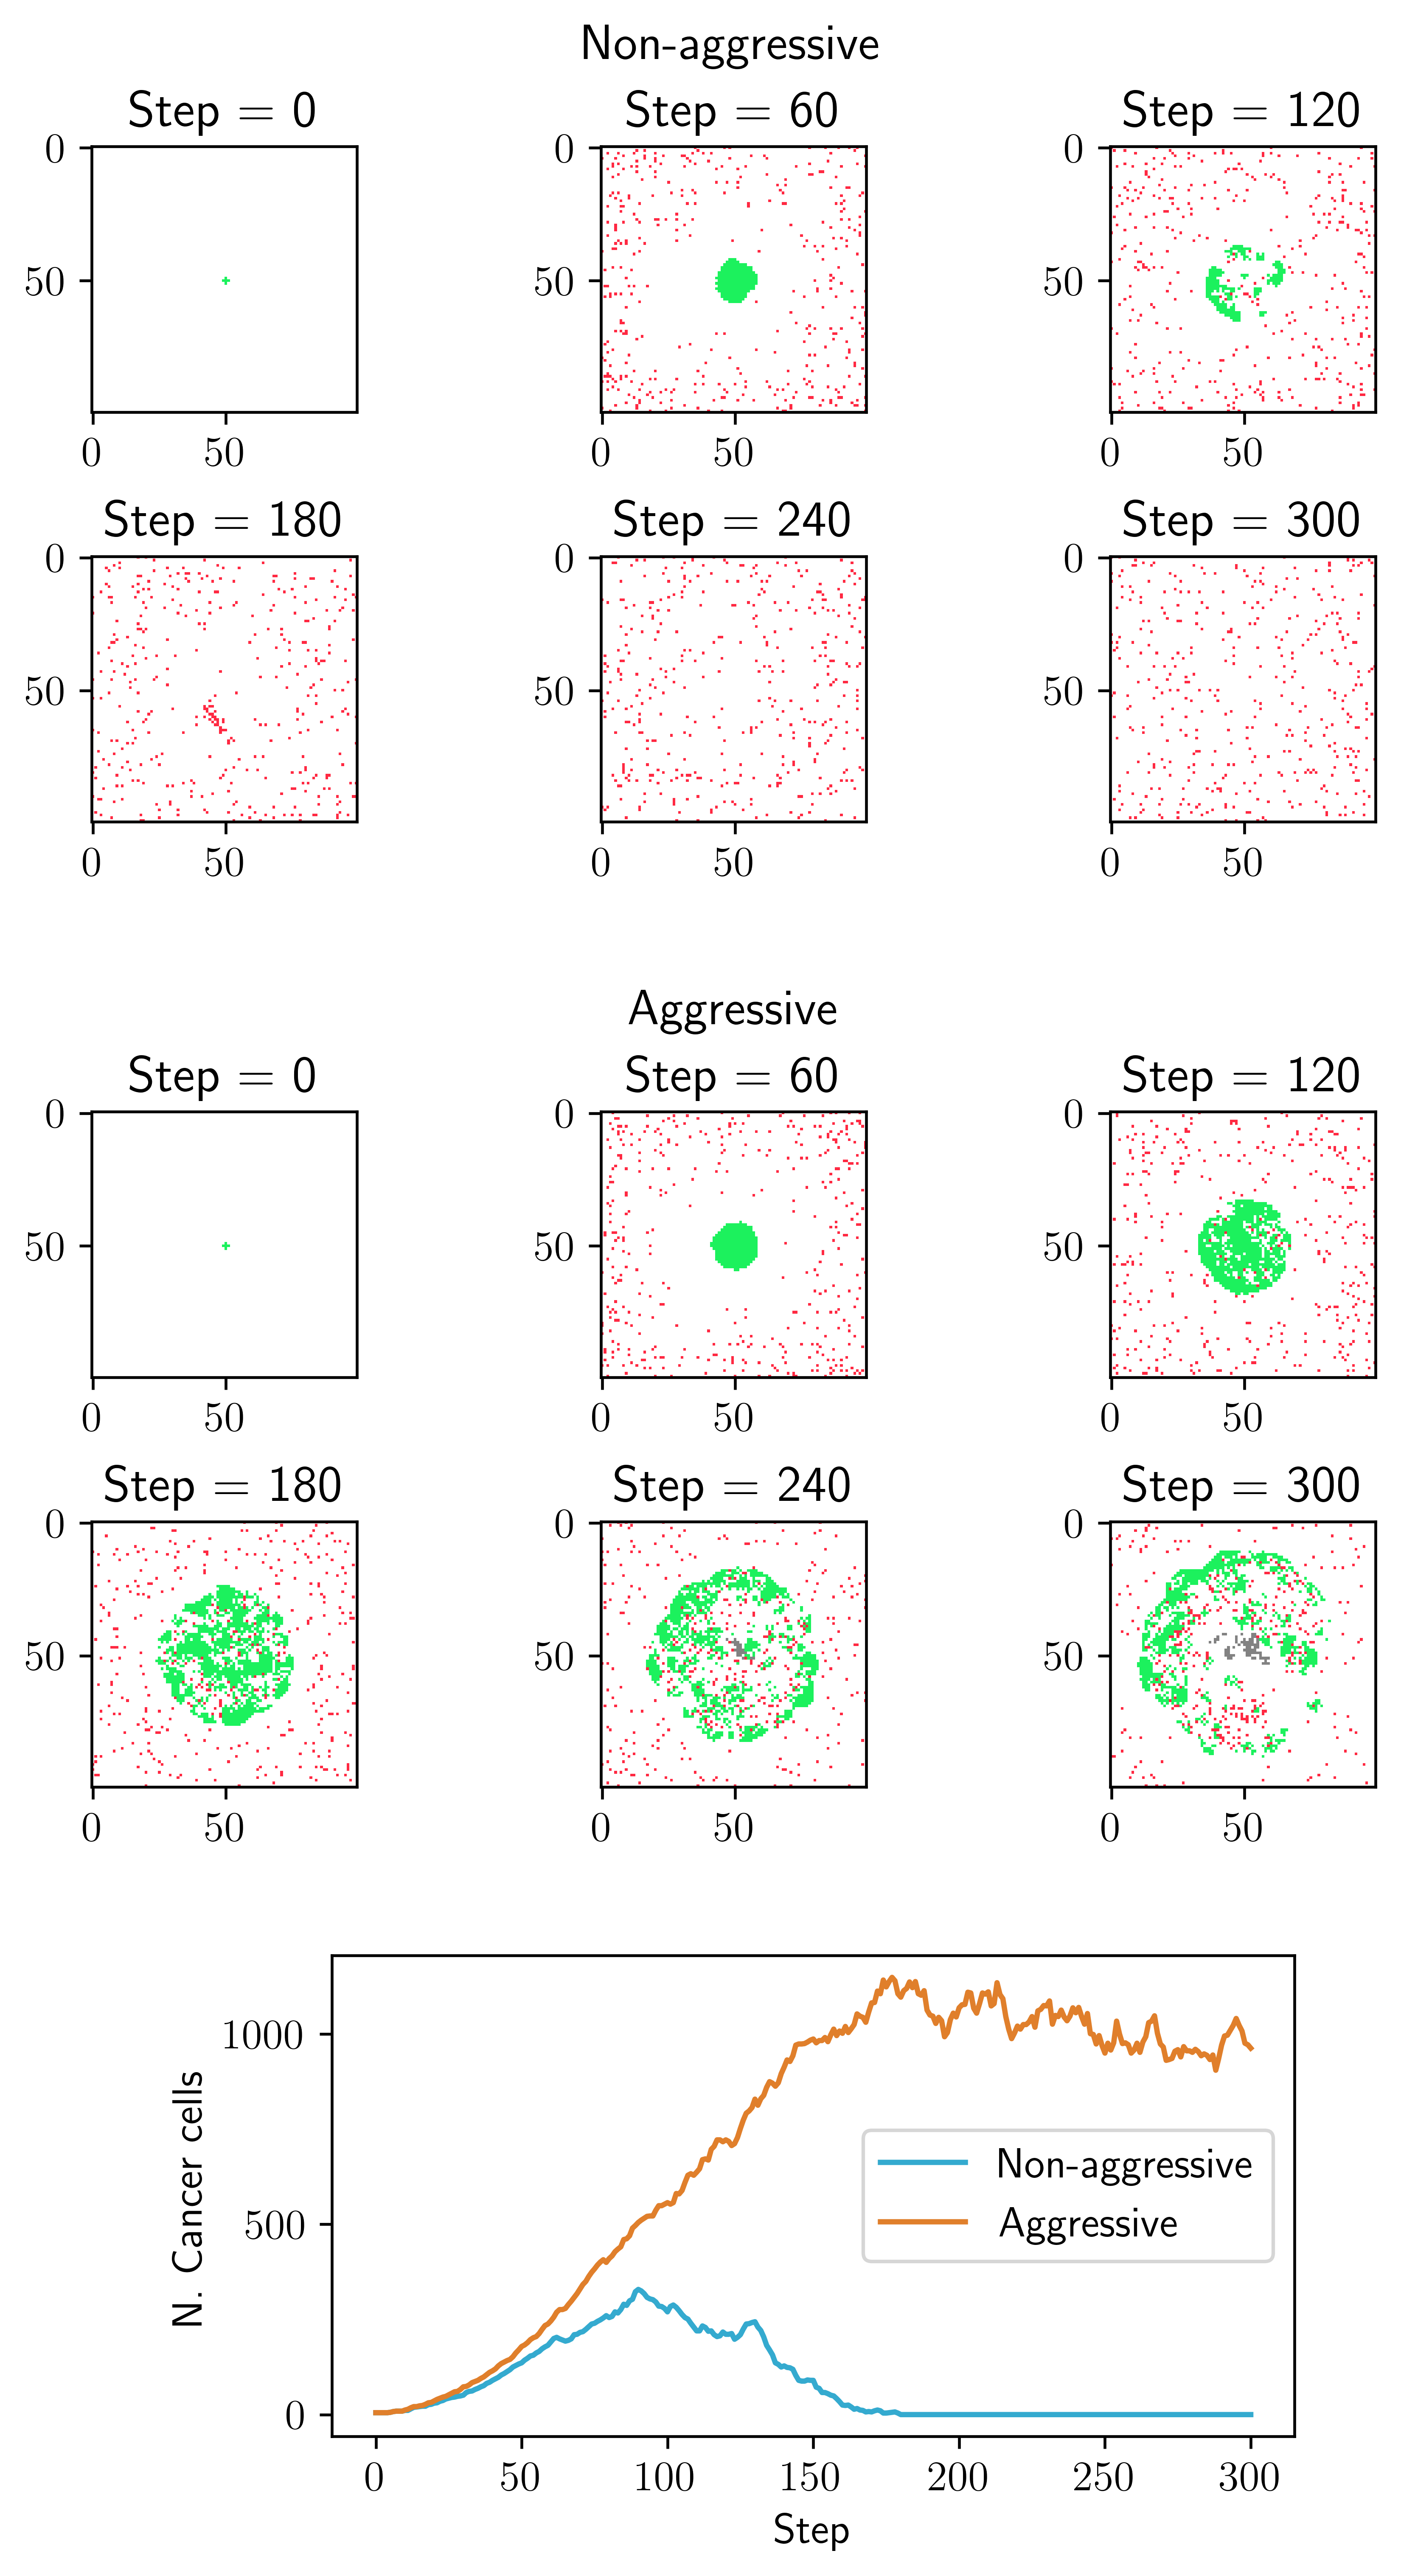

In [5]:
frameIndexes = [0]
deltaFrame = int(nSteps/5)

for i in range(0,5):
    frameIndexes.append(frameIndexes[-1] + deltaFrame)


plt.rcParams['text.usetex'] = True

fig = plt.figure(figsize = (6,10),constrained_layout=True, dpi = 600)
subfigs = fig.subfigures(3, 1, hspace=0.1, height_ratios=[1, 1, 0.7], wspace = 0)

subfigs[0].suptitle('Non-aggressive', fontsize=14)
ax1 = subfigs[0].subplots(2,3)
ax1[0,0].imshow(tissue1.immuneTumorMovie[:,:,:,frameIndexes[0]])
ax1[0,0].set_title("Step = "+str(frameIndexes[0]))
ax1[0,1].imshow(tissue1.immuneTumorMovie[:,:,:,frameIndexes[1]])
ax1[0,1].set_title("Step = "+str(frameIndexes[1]))
ax1[0,2].imshow(tissue1.immuneTumorMovie[:,:,:,frameIndexes[2]])
ax1[0,2].set_title("Step = "+str(frameIndexes[2]))
ax1[1,0].imshow(tissue1.immuneTumorMovie[:,:,:,frameIndexes[3]])
ax1[1,0].set_title("Step = "+str(frameIndexes[3]))
ax1[1,1].imshow(tissue1.immuneTumorMovie[:,:,:,frameIndexes[4]])
ax1[1,1].set_title("Step = "+str(frameIndexes[4]))
ax1[1,2].imshow(tissue1.immuneTumorMovie[:,:,:,frameIndexes[5]])
ax1[1,2].set_title("Step = "+str(frameIndexes[5]))

subfigs[1].suptitle('Aggressive', fontsize=14)
ax2 = subfigs[1].subplots(2,3)
ax2[0,0].imshow(tissue3.immuneTumorMovie[:,:,:,frameIndexes[0]])
ax2[0,0].set_title("Step = "+str(frameIndexes[0]))
ax2[0,1].imshow(tissue3.immuneTumorMovie[:,:,:,frameIndexes[1]])
ax2[0,1].set_title("Step = "+str(frameIndexes[1]))
ax2[0,2].imshow(tissue3.immuneTumorMovie[:,:,:,frameIndexes[2]])
ax2[0,2].set_title("Step = "+str(frameIndexes[2]))
ax2[1,0].imshow(tissue3.immuneTumorMovie[:,:,:,frameIndexes[3]])
ax2[1,0].set_title("Step = "+str(frameIndexes[3]))
ax2[1,1].imshow(tissue3.immuneTumorMovie[:,:,:,frameIndexes[4]])
ax2[1,1].set_title("Step = "+str(frameIndexes[4]))
ax2[1,2].imshow(tissue3.immuneTumorMovie[:,:,:,frameIndexes[5]])
ax2[1,2].set_title("Step = "+str(frameIndexes[5]))

ax3 = subfigs[2].subplots(1,3, width_ratios = [1,5,1])
subfigs[2].delaxes(ax3[0])
subfigs[2].delaxes(ax3[2])
ax3[1].plot(tissue1.cellCountSeries[:,0] + tissue1.cellCountSeries[:,1],label = "Non-aggressive", color = "#34aacf")
ax3[1].plot(tissue3.cellCountSeries[:,0] + tissue3.cellCountSeries[:,1], label = "Aggressive", color = "#e07f2b")
ax3[1].set_xlabel("Step")
ax3[1].set_ylabel("N. Cancer cells")
ax3[1].legend()

plt.savefig("cancer_immune_evolution.pdf",format="pdf", bbox_inches="tight")